# House Prices - Advanced Regression Techniques
- Predict sales prices and practice feature engineering, RFs, and gradient boosting
- https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

# 0. 패키지

In [38]:
import os
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 1. 데이터셋

In [4]:
origin_df = pd.read_csv('train.csv').set_index('Id')
origin_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
test_df = pd.read_csv('test.csv').set_index('Id')
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


# 2. EDA

## 2.1 Info

In [5]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2.2 Describe

In [6]:
origin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


## 2.3 상관계수 히트맵

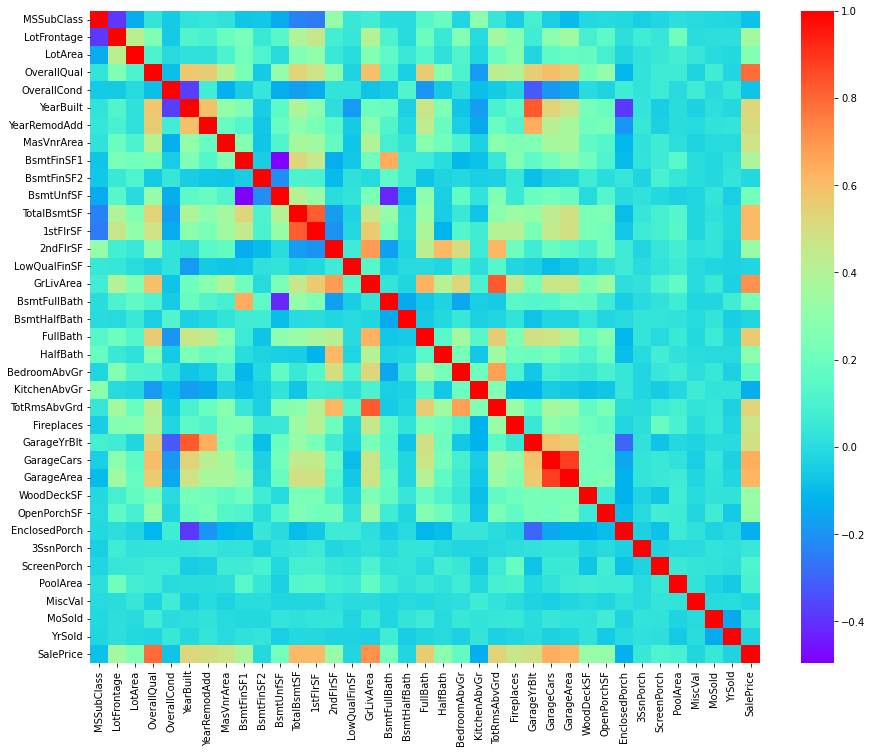

In [8]:
plt.figure(figsize=(15,12))

sns.heatmap(origin_df.corr(), cmap='rainbow')

plt.show()

## 2.4 YearBuilt + YearRemodAdd + YrSold와 SalePrice의 관계

In [24]:
years = pd.DataFrame({'Built':origin_df['YearBuilt'], 'RA':origin_df['YearRemodAdd'], 'Sold':origin_df['YrSold'], 'SalePrice':origin_df['SalePrice']})
years['isRA'] = years['Built'] != years['RA']
years['RaToSold'] = years['Sold'] - years['RA']
years['BuiltToSold'] = years['Sold'] - years['Built']
years

,Built,RA,Sold,SalePrice,isRA,RaToSold,BuiltToSold
Id,,,,,,,
1,2003,2003,2008,208500,False,5,5
2,1976,1976,2007,181500,False,31,31
3,2001,2002,2008,223500,True,6,7
4,1915,1970,2006,140000,True,36,91
5,2000,2000,2008,250000,False,8,8
...,...,...,...,...,...,...,...
1456,1999,2000,2007,175000,True,7,8
1457,1978,1988,2010,210000,True,22,32
1458,1941,2006,2010,266500,True,4,69


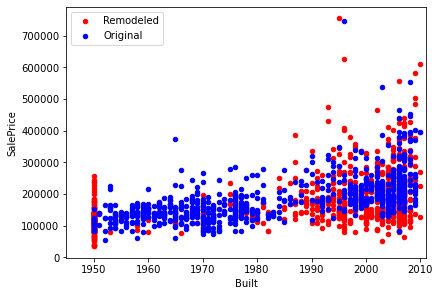

In [38]:
fig, ax = plt.subplots(constrained_layout=True)

years[years['isRA']].plot(kind='scatter', x='RA', y='SalePrice', c='red', ax=ax)
years[years['isRA'] == False].plot(kind='scatter', x='Built', y='SalePrice', c='blue', ax=ax)

ax.legend(['Remodeled', 'Original'])
ax.set_xlim(1945, 2011)
plt.show()

In [25]:
years.corr()['SalePrice']

Built          0.522897
RA             0.507101
Sold          -0.028923
SalePrice      1.000000
isRA          -0.021933
RaToSold      -0.509079
BuiltToSold   -0.523350
Name: SalePrice, dtype: float64

## 2.5 카테고리별 SalePrice Boxplot

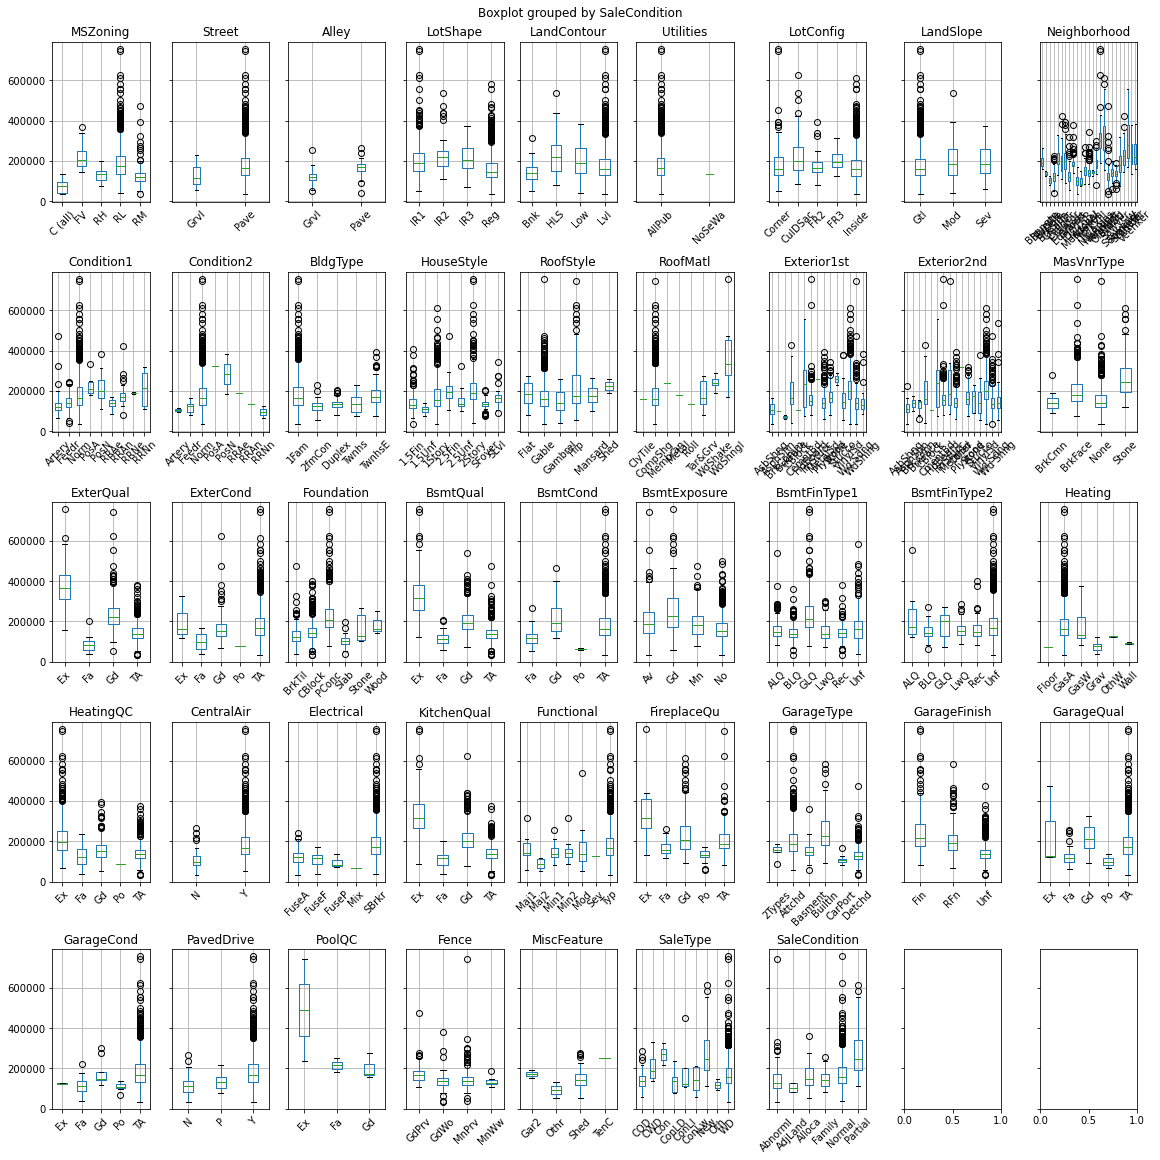

In [174]:
fig, axes = plt.subplots(5, 9, figsize=(16,16), constrained_layout=True, sharey='row')

for i, c in enumerate(origin_df.select_dtypes('object').columns) :
    origin_df.boxplot(by=c, column=['SalePrice'], ax=axes[i//9, i%9], rot=45)
    axes[i//9, i%9].set_title(c)
    axes[i//9, i%9].set_xlabel('')

plt.show()

## 2.6 SalePrice 상관계수

In [6]:
tmp_df = origin_df[:]
qc = [c for c in origin_df.select_dtypes('object').columns if set(origin_df[c].unique()) <= {'Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan}]
le = LabelEncoder()
le.classes_ = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA', np.nan]

for column in qc :
    tmp_df[column] = le.transform(tmp_df[column])

for c in tmp_df.select_dtypes('object').columns :
    le = LabelEncoder()
    tmp_df[c] = le.fit_transform(tmp_df[c])

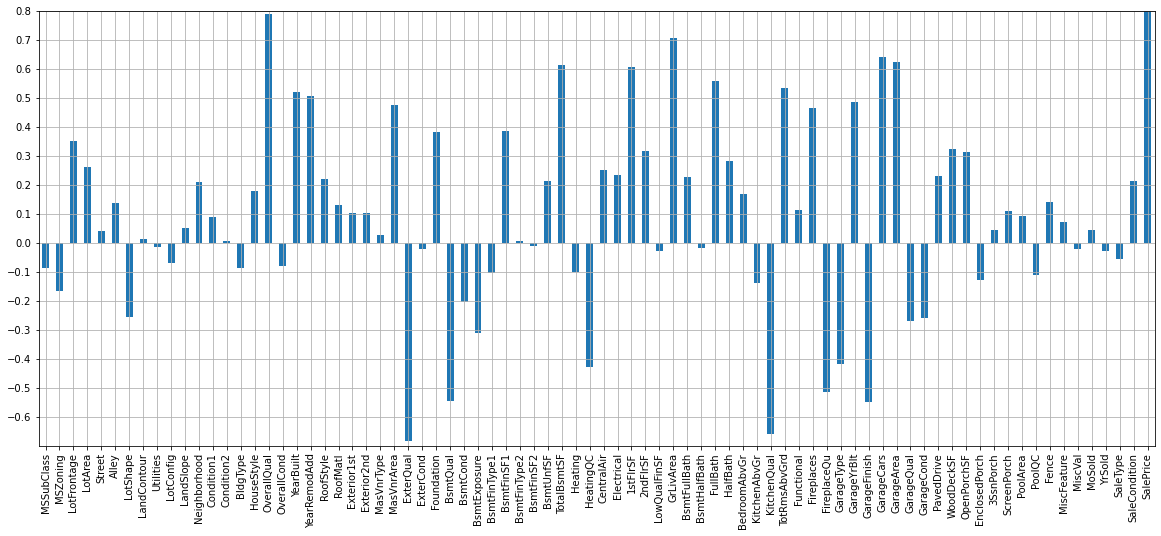

In [41]:
tmp_df.corr()['SalePrice'].plot(kind='bar', figsize=(20, 8))

plt.yticks(np.arange(-0.6, 1.01, 0.1))
plt.ylim(-0.7, 0.8)

plt.grid(True)

plt.show()

# 3. 데이터 정제
  - 결측치가 50% 이상인 컬럼 제거 (Alley, PoolQC, Fence, MiscFeature)
  - SalePrice와의 상관계수가 0.3 미만인 컬럼 제거
    - object형의 경우 Label Encoding을 통해 변환
    - 퀄리티를 나타낸 경우 정해진 순서에 맞게 변환
  - 비슷한 의미를 가진 컬럼들을 축소
    - GarageCars - GarageArea
    - Fireplaces - FireplaceQu
    - YearBuilt - YearRemodAdd - GarageYrBlt
  - LotFrontage, MasVnrArea 결측치를 평균으로 fill

In [8]:
filtered_cols = list(tmp_df.corr()['SalePrice'][tmp_df.corr()['SalePrice'].abs() >= 0.3].index)
filtered_cols.remove('Fireplaces')
filtered_cols.remove('GarageArea')
filtered_cols.remove('YearBuilt')
filtered_cols.remove('GarageYrBlt')
filtered_cols, len(filtered_cols)

(['LotFrontage',
  'OverallQual',
  'YearRemodAdd',
  'MasVnrArea',
  'ExterQual',
  'Foundation',
  'BsmtQual',
  'BsmtExposure',
  'BsmtFinSF1',
  'TotalBsmtSF',
  'HeatingQC',
  '1stFlrSF',
  '2ndFlrSF',
  'GrLivArea',
  'FullBath',
  'KitchenQual',
  'TotRmsAbvGrd',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageCars',
  'WoodDeckSF',
  'OpenPorchSF',
  'SalePrice'],
 24)

In [7]:
tmp_df = origin_df[:]
qc = [c for c in origin_df.select_dtypes('object').columns if set(origin_df[c].unique()) <= {'Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan}]
le = LabelEncoder()
le.classes_ = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA', np.nan]

for column in qc :
    tmp_df[column] = le.transform(tmp_df[column])

for c in tmp_df.select_dtypes('object').columns :
    le = LabelEncoder()
    tmp_df[c] = le.fit_transform(tmp_df[c])

filtered_cols = ['LotFrontage', 'OverallQual', 'YearRemodAdd', 'MasVnrArea', 
  'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 
  'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 
  'TotRmsAbvGrd', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 
  'WoodDeckSF', 'OpenPorchSF', 'SalePrice']

In [8]:
train_df = tmp_df[filtered_cols]
train_df

,LotFrontage,OverallQual,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,...,FullBath,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,7,2003,196.0,1,2,1,3,706,856,...,2,1,8,6,1,1,2,0,61,208500
2,80.0,6,1976,0.0,2,1,1,1,978,1262,...,2,2,6,2,1,1,2,298,0,181500
3,68.0,7,2002,162.0,1,2,1,2,486,920,...,2,1,6,2,1,1,2,0,42,223500
4,60.0,7,1970,0.0,2,0,2,3,216,756,...,1,1,7,1,5,2,3,0,35,140000
5,84.0,8,2000,350.0,1,2,1,0,655,1145,...,2,1,9,2,1,1,3,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,6,2000,0.0,2,2,1,3,0,953,...,2,2,7,2,1,1,2,0,40,175000
1457,85.0,6,1988,119.0,2,1,1,3,790,1542,...,2,2,7,2,1,2,2,349,0,210000
1458,66.0,7,2006,0.0,0,4,2,3,275,1152,...,2,1,9,1,1,1,1,0,60,266500


In [9]:
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean(), inplace=True)
train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12272\1320926319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12272\1320926319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(), inplace=True)


In [10]:
rs = 22
train_df, val_df = train_test_split(train_df, test_size=0.15, random_state=rs)
len(train_df), len(val_df)

(1241, 219)

In [11]:
train_Y = train_df['SalePrice']
train_X = train_df.drop('SalePrice', axis=1)

val_Y = val_df['SalePrice']
val_X = val_df.drop('SalePrice', axis=1)

# 4. 모델

## 4.1 Linear Regression

In [42]:
linear = LinearRegression()
linear.fit(train_X, train_Y)

pred_Y = linear.predict(val_X)

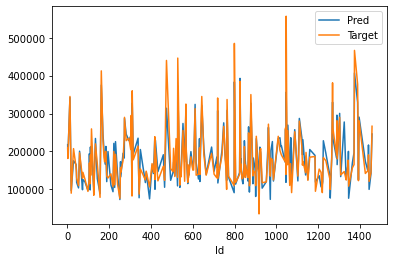

In [45]:
pd.DataFrame({'Pred':pred_Y, 'Target':val_Y}).sort_index().plot()

plt.show()

In [62]:
euclidean_distances(val_Y.values.reshape(1, -1), pred_Y.reshape(1, -1))

array([[455275.73214261]])

## 4.2 torch

In [12]:
class CustomModel(nn.Module) :
    def __init__(self, input_size) :
        super().__init__()

        self.linear1 = nn.Linear(input_size, 1)

    def forward(self, x) :
        x = self.linear1(x)

        return x

In [13]:
def to_tensor(df) :
    return torch.from_numpy(df.values).float()

In [14]:
train_dataset = TensorDataset(to_tensor(train_X), to_tensor(train_Y))
train_dataloader = DataLoader(train_dataset, batch_size=64, drop_last=True)

val_dataset = TensorDataset(to_tensor(val_X), to_tensor(val_Y))
val_dataloader = DataLoader(val_dataset)

In [34]:
def train(model, dataloader, optimizer, criterion, epoch, log=False) :
    model.train()

    train_loss = 0.0
    total = 0

    for i, (inputs, targets) in enumerate(dataloader) :
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs.view(-1), targets)
        loss.backward()
        
        optimizer.step()

        total += targets.size(0)
        train_loss = loss.item()

    avg_loss = train_loss / total

    if log and epoch % 5 == 4 :
        print('[ Train Epoch : {} ]'.format(epoch + 1))
        print('Train Average Loss : {}'.format(avg_loss))

    return avg_loss

def eval(model, dataloader, criterion, epoch, log=False) :
    model.eval()

    val_loss = 0.0
    total = 0

    for i, (inputs, targets) in enumerate(dataloader) :
        inputs, targets = inputs.to(device), targets.to(device)
        
        outputs = model(inputs)
        val_loss += criterion(outputs.view(-1), targets).item()

        total += targets.size(0)

    avg_loss = val_loss / total

    if log and epoch % 5 == 4 :
        print('[ Validate Epoch : {} ]'.format(epoch + 1))
        print('Average Loss : {}'.format(avg_loss))

    return avg_loss


In [44]:
def run(model, criterion, optimizer, epochs) :
    train_loss = []
    val_loss = []
    save_loss = float('inf')

    for i in tqdm(range(epochs)) :
        t_loss = train(model, train_dataloader, optimizer, criterion, i)
        train_loss.append(t_loss)

        v_loss = eval(model, val_dataloader, criterion, i)
        val_loss.append(v_loss)

        if save_loss > v_loss :
            save_loss = v_loss
            torch.save(model, './checkpoints/linear1.pt')

    return train_loss, val_loss

In [45]:
lr = 0.001
device = 'cuda' if torch.cuda.is_available() else 'cpu'

net = CustomModel(len(train_X.columns)).to(device)
optimizer = optim.SGD(net.parameters(), lr=lr)
criterion = nn.SmoothL1Loss()

if not os.path.exists('checkpoints') :
    os.mkdir('checkpoints')

In [46]:
train_loss, val_loss = run(net, criterion, optimizer, 500)

  0%|          | 0/500 [00:00<?, ?it/s]c:\Users\USER\anaconda3\lib\site-packages\torch\nn\modules\loss.py:912: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)
100%|██████████| 500/500 [00:19<00:00, 25.74it/s]


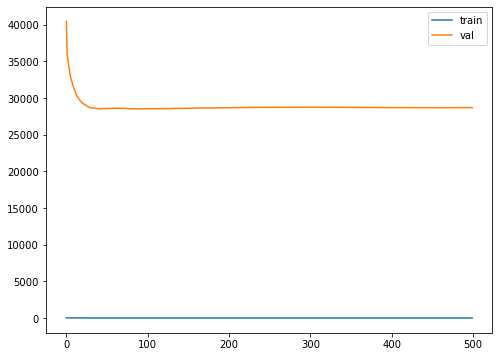

In [47]:
pd.DataFrame({'train':train_loss, 'val':val_loss}).plot(figsize=(8,6))

plt.show()